<a href="https://colab.research.google.com/github/Daniel-Karlik/BI/blob/main/pivot_table_DK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/Daniel-Karlik/BI/main/train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vynecháme proměnné jež nevyužijeme.

In [3]:
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

## Using index in a Pivot Table

In [4]:
grouped = pd.pivot_table(data=df,index=['Sex'])
grouped
#grouped.plot(kind='bar')

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


### Multi-index



In [8]:
grouped = pd.pivot_table(df,index=['Sex','Pclass'], margins=True)
grouped

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447
All            35.674426   78.682469  0.475410  0.464481  0.672131

### Agregační funkce kontingenčních tabulek

In [10]:
grouped = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
grouped

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

In [ ]:
grouped.plot(kind='bar');

### **Columns** parametr

Lze využít pro nalezení vztahu mezi proměnnými.

In [15]:
grouped = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
grouped

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

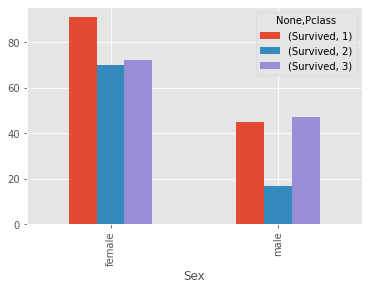

In [14]:
grouped.plot(kind='bar');

### Chybějící hodnoty v kontingenčních tabulkách

In [16]:
grouped = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
grouped

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

Pandas pivot_table umožňuje řešit chybějící data následovně:
* dropna - vynechá cgybějící hodnoty
* fill_value - nahrádí chybějící hodnoty zvolenou hodnotou

In [17]:
grouped = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
grouped

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333